# TITANIC ML PRACTICE NOTEBOOK

### I. Dataset Identification
1. Assign test and training datasets to variables using Pandas
2. Identify dimensions of data (entries x features) 
```
variable.shape()
```
3. Identify which features in the data lack values 
```
variable.info()
variable.describe()
```
4. Do this for both testing and training data

### II. Feature Engineering
1. Print out labels to visualize data
2. Figure out which features to keep
```
variable.dropna()
```
3. Combine test and training data before converting categorical features to numerical ones
```
train_test_data = [train_data, test_data]
```
```
for dataset in train_test_data:
     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
```
4. Drop out features with NaN or fill them with median/mode/mean/others

### III. Classification
1. Assign all features but the y label to X_train
```
X_train = train_data.drop('Survived', axis=1)
```
2. Assign y label to y_train
```
y_train = train_data['Survived']
```
3. Copy array of test_data to X_test
```
X_test = test_data.copy()
```
4. Select classifier then note accuracy
```
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_set_pred = classifier.predict(X_test)
```
```
acc_log_reg = round(classifier.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

```

# I. Dataset Identification

Importing the necessary packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import os
for dirname, _, filenames in os.walk('../Course 2 (Basic Algorithms)/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../Course 2 (Basic Algorithms)/kaggle/input/gender_submission.csv
../Course 2 (Basic Algorithms)/kaggle/input/test.csv
../Course 2 (Basic Algorithms)/kaggle/input/train.csv


## Assigning dataset to a dataframe in Pandas

In [2]:
train_data = pd.read_csv("../Course 2 (Basic Algorithms)/kaggle/input/train.csv")
test_data = pd.read_csv("../Course 2 (Basic Algorithms)/kaggle/input/test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


test_data.isnull().sum()

# II. Feature Engineering

Sex vs. Survivability

In [8]:
train_data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

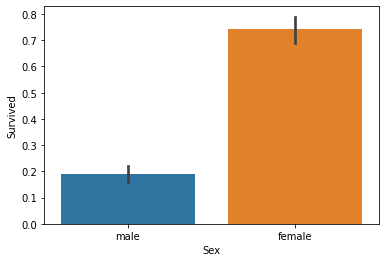

In [9]:
sns.barplot(x='Sex', y='Survived', data=train_data)

Combining both datasets for Mapping Preparation

In [10]:
train_test_data = [train_data, test_data] # combining train and test dataset

Filling out empty parameters with Mode value

In [11]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Age'] = dataset['Age'].fillna(train_data['Age'].median())

In [12]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


# III. Classification

In [15]:
features_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

train_data = train_data.drop(features_to_drop, axis=1)
train_data = train_data.drop('PassengerId', axis=1)
test_data = test_data.drop(features_to_drop, axis=1)

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,0
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,0
4,0,3,0,35.0,0


In [17]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,0,34.5,2
1,893,3,1,47.0,0
2,894,2,0,62.0,2
3,895,3,0,27.0,0
4,896,3,1,22.0,0


Now that we have concatenated the datasets to match, let's assign them to variables for our classifier.

In [18]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [19]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [20]:
y_train.isnull().sum()

0

In [21]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_set_pred = classifier.predict(X_test)
acc_log_reg = round(classifier.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

79.01 percent


In [22]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_set_pred})
output.to_csv('output.csv', index=False)